# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook:
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up

In [3]:
import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
!curl -O https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  104M    0 49289    0     0  56499      0  0:32:18 --:--:--  0:32:18 56719
  0  104M    0  936k    0     0   535k      0  0:03:19  0:00:01  0:03:18  536k
 12  104M   12 12.7M    0     0  4754k      0  0:00:22  0:00:02  0:00:20 4759k
 21  104M   21 22.2M    0     0  6063k      0  0:00:17  0:00:03  0:00:14 6069k
 27  104M   27 28.4M    0     0  6123k      0  0:00:17  0:00:04  0:00:13 6127k
 33  104M   33 34.7M    0     0  6178k      0  0:00:17  0:00:05  0:00:12 7272k
 38  104M   38 40.3M    0     0  6123k      0  0:00:17  0:00:06  0:00:11 8078k
 45  104M   45 47.1M    0     0  6224k      0  0:00:17  0:00:07  0:00:10 7034k
 50  104M   50 53.1M    0     0  6223k      0  0:00:17  0:00:08  0:00:09 6342k
 57  104M   57 59.5M    0     0  6257k      0  0:00

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [1]:
# !ls pizza_steak
!dir pizza_steak

 Volume in drive C is Windows-SSD
 Volume Serial Number is 92D5-F2A2

 Directory of C:\Users\kangs\DataspellProjects\tensorflow-zero-to-master\pizza_steak

29/01/2025  12.43    <DIR>          .
31/01/2025  09.04    <DIR>          ..
29/01/2025  12.43    <DIR>          test
29/01/2025  12.43    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  835.230.130.176 bytes free


In [2]:
# !ls pizza_steak/train/
!dir pizza_steak\train\

 Volume in drive C is Windows-SSD
 Volume Serial Number is 92D5-F2A2

 Directory of C:\Users\kangs\DataspellProjects\tensorflow-zero-to-master\pizza_steak\train

29/01/2025  12.43    <DIR>          .
29/01/2025  12.43    <DIR>          ..
29/01/2025  12.43    <DIR>          pizza
29/01/2025  12.43    <DIR>          steak
               0 File(s)              0 bytes
               4 Dir(s)  835.230.068.736 bytes free


In [3]:
# !ls pizza_steak/train/steak
!dir pizza_steak\train\steak

 Volume in drive C is Windows-SSD
 Volume Serial Number is 92D5-F2A2

 Directory of C:\Users\kangs\DataspellProjects\tensorflow-zero-to-master\pizza_steak\train\steak

29/01/2025  12.43    <DIR>          .
29/01/2025  12.43    <DIR>          ..
29/01/2025  12.43            36.185 1000205.jpg
29/01/2025  12.43            34.497 100135.jpg
29/01/2025  12.43           116.802 101312.jpg
29/01/2025  12.43            56.754 1021458.jpg
29/01/2025  12.43            34.143 1032846.jpg
29/01/2025  12.43            24.688 10380.jpg
29/01/2025  12.43            37.134 1049459.jpg
29/01/2025  12.43            49.841 1053665.jpg
29/01/2025  12.43            59.983 1068516.jpg
29/01/2025  12.43            28.996 1068975.jpg
29/01/2025  12.43            29.525 1081258.jpg
29/01/2025  12.43            49.577 1090122.jpg
29/01/2025  12.43            59.976 1093966.jpg
29/01/2025  12.43            60.253 1098844.jpg
29/01/2025  12.43            69.843 1100074.jpg
29/01/2025  12.43            45.470 110

In [4]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [5]:
# !ls -la pizza_steak
!dir /a pizza_steak

 Volume in drive C is Windows-SSD
 Volume Serial Number is 92D5-F2A2

 Directory of C:\Users\kangs\DataspellProjects\tensorflow-zero-to-master\pizza_steak

29/01/2025  12.43    <DIR>          .
31/01/2025  09.16    <DIR>          ..
29/01/2025  12.43    <DIR>          test
29/01/2025  12.43    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  835.227.475.968 bytes free


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}") # Show the shape of the image
    
    return img

['179165.jpg']
Image shape: (512, 382, 3)


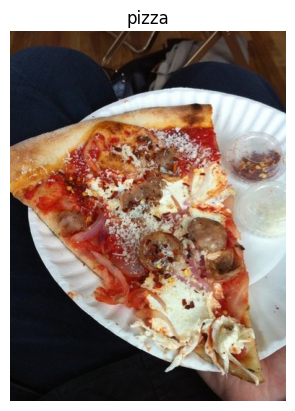

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
224, 224, 3

(224, 224, 3)

In [11]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[69, 43, 16],
        [71, 45, 18],
        [76, 50, 23],
        ...,
        [89, 55, 27],
        [88, 54, 26],
        [87, 53, 25]],

       [[69, 43, 16],
        [72, 46, 19],
        [78, 52, 25],
        ...,
        [91, 57, 29],
        [89, 55, 27],
        [89, 55, 27]],

       [[70, 43, 16],
        [75, 48, 21],
        [82, 55, 28],
        ...,
        [93, 59, 31],
        [92, 58, 30],
        [91, 57, 29]],

       ...,

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [99, 70, 66],
        [95, 66, 62],
        [92, 63, 59]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [88, 59, 55],
        [84, 55, 51],
        [80, 51, 47]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [80, 51, 47],
        [76, 47, 43],
        [73, 44, 40]]], dtype=uint8)>

In [12]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 382, 3)

> 🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [13]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.27058824, 0.16862745, 0.0627451 ],
        [0.27843137, 0.17647059, 0.07058824],
        [0.29803922, 0.19607843, 0.09019608],
        ...,
        [0.34901961, 0.21568627, 0.10588235],
        [0.34509804, 0.21176471, 0.10196078],
        [0.34117647, 0.20784314, 0.09803922]],

       [[0.27058824, 0.16862745, 0.0627451 ],
        [0.28235294, 0.18039216, 0.0745098 ],
        [0.30588235, 0.20392157, 0.09803922],
        ...,
        [0.35686275, 0.22352941, 0.11372549],
        [0.34901961, 0.21568627, 0.10588235],
        [0.34901961, 0.21568627, 0.10588235]],

       [[0.2745098 , 0.16862745, 0.0627451 ],
        [0.29411765, 0.18823529, 0.08235294],
        [0.32156863, 0.21568627, 0.10980392],
        ...,
        [0.36470588, 0.23137255, 0.12156863],
        [0.36078431, 0.22745098, 0.11764706],
        [0.35686275, 0.22352941, 0.11372549]],

       ...,

       [[0.04313725, 0.04313725, 0.04313725],
        [0.04313725, 0.04313725, 0.04313725],
        [0.04313725, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 9s 155ms/step - loss: 0.6204 - accuracy: 0.6653 - val_loss: 0.4435 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 7s 138ms/step - loss: 0.4342 - accuracy: 0.7960 - val_loss: 0.3459 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3805 - accuracy: 0.8367 - val_loss: 0.3110 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3512 - accuracy: 0.8427 - val_loss: 0.2952 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 6s 128ms/step - loss: 0.3123 - accuracy: 0.8793 - val_loss: 0.2790 - val_accuracy: 0.8800


In [15]:
len(train_data)

47

In [16]:
1500/32

46.875

In [17]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

🛠️ **Practice/exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with theirs:
https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.87053&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). 

In [18]:
train_data

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model a replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6941 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 3s 73ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 3s 68ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 3s 70ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 3s 69ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [20]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [21]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 109ms/step - loss: 2.5116 - accuracy: 0.6447 - val_loss: 0.5914 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 3s 64ms/step - loss: 0.5926 - accuracy: 0.7320 - val_loss: 0.7239 - val_accuracy: 0.6420
Epoch 3/5
47/47 [==============================] - 3s 62ms/step - loss: 0.9454 - accuracy: 0.6647 - val_loss: 0.7822 - val_accuracy: 0.5820
Epoch 4/5
47/47 [==============================] - 3s 64ms/step - loss: 0.6132 - accuracy: 0.7280 - val_loss: 0.6006 - val_accuracy: 0.7160
Epoch 5/5
47/47 [==============================] - 3s 64ms/step - loss: 0.6168 - accuracy: 0.7200 - val_loss: 0.4469 - val_accuracy: 0.7920


In [23]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [25]:
15073201/31101

484.6532587376612

> 🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots cases, it is. But in this case, the difference here is the two different styles of model we're using. Where series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So an even though these are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different **features** in an image.

In [26]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['1348047.jpg']
Image shape: (512, 512, 3)
['598381.jpg']
Image shape: (306, 512, 3)


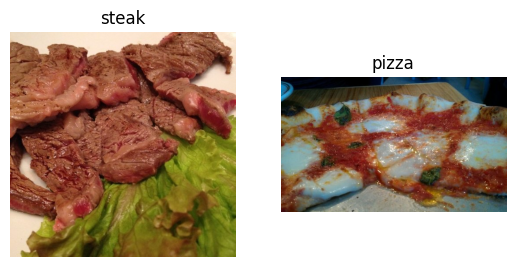

In [33]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
Because 32 is good for your health... https://x.com/ylecun/status/989610208497360896

In [38]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [39]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
